In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\Academics\Projects\Machine Learning Projects\Airline TS Project\airline-passengers.csv")

In [3]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df = df.rename(columns={'Month': 'ds', 'Passengers': 'y'})

In [5]:
df.dtypes

ds    object
y      int64
dtype: object

In [6]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m')

In [7]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [9]:
from prophet import Prophet

In [10]:
model = Prophet()

In [11]:
model.fit(df)

22:00:21 - cmdstanpy - INFO - Chain [1] start processing
22:00:22 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=36, freq="MS")


In [13]:
forecast = model.predict(future)

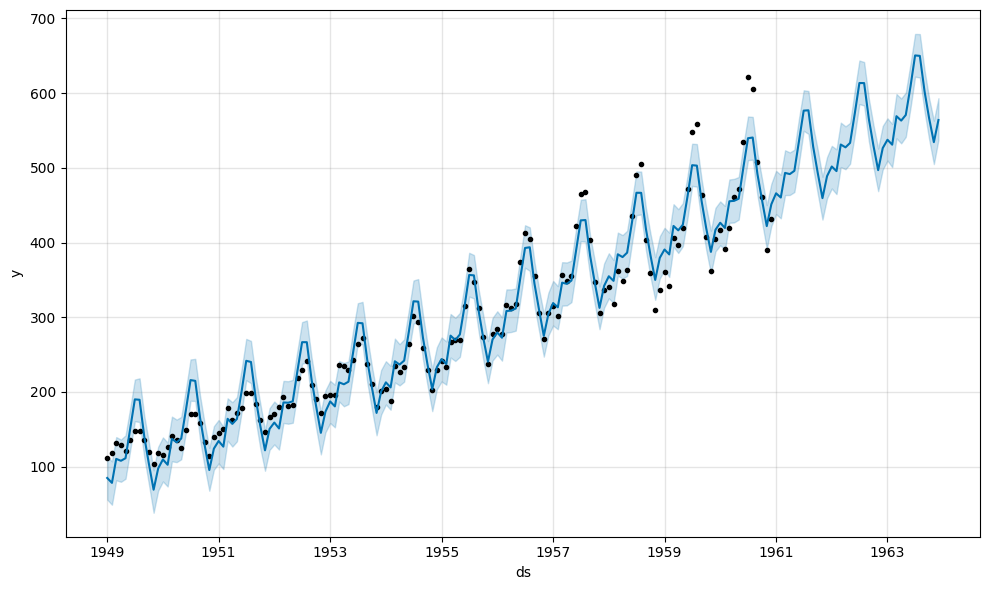

In [14]:
model.plot(forecast)
plt.show()

In [15]:
forecast_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={
    'yhat': 'y_forecasted',
    'yhat_lower': 'y_forecasted_lower',
    'yhat_upper': 'y_forecasted_upper',
    'ds': 'Month'  
})

In [16]:
df = df.rename(columns={'ds': 'Month', 'y': 'Passengers'})

In [17]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [18]:
df_full = pd.merge(df, forecast_values, on='Month', how='right') 

In [19]:
df_full

,Month,Passengers,y_forecasted,y_forecasted_lower,y_forecasted_upper
0,1949-01-01,112.0,84.814159,55.824111,113.634876
1,1949-02-01,118.0,78.227931,48.947863,107.007247
2,1949-03-01,132.0,110.342237,81.716331,139.535873
3,1949-04-01,129.0,107.810718,79.668806,136.258750
4,1949-05-01,121.0,111.266255,83.756206,141.793244
...,...,...,...,...,...
175,1963-08-01,NaN,649.848630,620.884976,679.026397
176,1963-09-01,NaN,602.344925,575.571518,630.638907
177,1963-10-01,NaN,566.285229,538.241199,593.023182
178,1963-11-01,NaN,534.334833,504.958642,563.117894


In [20]:
df_full = df_full.drop(columns=['y_forecasted_lower', 'y_forecasted_upper'])

In [21]:
df_full = df_full.rename(columns={'y_forecasted': 'forecasted'})

In [22]:
df_full.tail(38)

,Month,Passengers,forecasted
142,1960-11-01,390.0,421.955303
143,1960-12-01,432.0,451.174702
144,1961-01-01,NaN,465.855759
145,1961-02-01,NaN,460.213899
146,1961-03-01,NaN,493.181183
147,1961-04-01,NaN,491.594032
148,1961-05-01,NaN,495.963474
149,1961-06-01,NaN,536.880539
150,1961-07-01,NaN,576.558728
151,1961-08-01,NaN,576.981538


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [24]:
historical_data = df_full.iloc[:144]
mae = mean_absolute_error(historical_data['Passengers'], historical_data['forecasted'])
mse = mean_squared_error(historical_data['Passengers'], historical_data['forecasted'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(historical_data['Passengers'], historical_data['forecasted'])

In [25]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Error (MAE): 17.38237120047183
Mean Squared Error (MSE): 505.2555358709972
Root Mean Squared Error (RMSE): 22.477889933688108
Mean Absolute Percentage Error (MAPE): 7.27%


In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(historical_data['Passengers'], historical_data['forecasted'])

0.9646476015484314